# OpenMC geometry from MSH

This tutorial will introduce how to use the **MeshToUniverse** module to model a complex geometry from gmesh output file. in this tutorial, we will model simple stellarator ([check here](https://en.wikipedia.org/wiki/Stellarator)). 

In [1]:
import random
import math
import os
import time
import numpy as np
import pandas as pd

import MeshToUniverse as Sms

import openmc
os.environ['OPENMC_CROSS_SECTIONS']='/Nuclear_Library/jeff-3.3-hdf5/cross_sections.xml'

The stellarator has toroidal cross section resembling elipse. The elips has minor radius 20 cm, minor radius 40 cm, circling/rotate origin with radius 150 cm (major radius) and twisted $720^{\circ}$ along rotation. The stellarator is coated with blanket. 

The stellarator is placed inside rectangular block to define the vaccum area. This was done due to difficulties in defining outside region with only rely to multiple surface mesh normals.

<img src="3D-Model/Stellarator_CAD.png" width="800" height="400">

The file was processed using Gmesh. The final mesh saved in .msh file format. Stored in 3D-Model directory.

In [2]:
R = 150
ra= 40
rb= 20
tw= 2

## 1. Read Data

**MeshToUniverse** module has method read_msh to read nodes and elements in .msh. The elements consists of list with structure of: number of elements , nodes index. The nodes consists of index and (x,y,z) coordinate. element with 4 nodes means it describe a triangle surface. If it is 5 then, it describe a tetrahedron.

In [3]:
nodes,elements = Sms.read_msh(os.getcwd()+'/3D-Model/Stellarator.msh',f=10)
pd.DataFrame(elements, index = ['elements '+str(x) for x in range(len(elements))])

,0,1,2,3,4,5,6,7,8,9,...,31366,31367,31368,31369,31370,31371,31372,31373,31374,31375
elements 0,"[1, 1, 2, 3]","[2, 1, 380, 2]","[3, 1, 3, 485]","[4, 381, 380, 1]","[5, 485, 381, 1]","[6, 3, 2, 4]","[7, 4, 2, 5]","[8, 2, 383, 5]","[9, 2, 380, 382]","[10, 2, 382, 383]",...,None,None,None,None,None,None,None,None,None,None
elements 1,"[10887, 5444, 5445, 5446]","[10888, 5444, 5802, 5445]","[10889, 5446, 5911, 5444]","[10890, 5801, 5802, 5444]","[10891, 5911, 5801, 5444]","[10892, 5446, 5445, 5447]","[10893, 5445, 5802, 5447]","[10894, 5446, 5447, 5448]","[10895, 5446, 5448, 6430]","[10896, 6430, 5911, 5446]",...,None,None,None,None,None,None,None,None,None,None
elements 2,"[20607, 10304, 10305, 10306]","[20608, 10305, 10304, 10311]","[20609, 10306, 10617, 10304]","[20610, 10311, 10304, 10312]","[20611, 10304, 10981, 10312]","[20612, 10304, 10617, 10981]","[20613, 10306, 10305, 10307]","[20614, 10305, 10982, 10307]","[20615, 10311, 11110, 10305]","[20616, 10305, 11110, 10982]",...,None,None,None,None,None,None,None,None,None,None
elements 3,"[22479, 3700, 11547, 3566, 11764]","[22480, 3247, 3113, 11359, 11942]","[22481, 1103, 11421, 11638, 11968]","[22482, 11417, 11555, 4799, 11611]","[22483, 11255, 11546, 11440, 11554]","[22484, 11460, 11670, 11875, 12131]","[22485, 3520, 11709, 11750, 12303]","[22486, 962, 11461, 793, 12345]","[22487, 3613, 11561, 11770, 12216]","[22488, 11369, 11919, 11711, 12377]",...,None,None,None,None,None,None,None,None,None,None
elements 4,"[46876, 19, 17, 6736, 18]","[46877, 328, 326, 6831, 327]","[46878, 5924, 5471, 5926, 5925]","[46879, 6182, 6737, 6738, 6859]","[46880, 5555, 5556, 5553, 5984]","[46881, 234, 232, 6803, 233]","[46882, 6741, 6863, 6984, 6862]","[46883, 195, 193, 6791, 194]","[46884, 5568, 5565, 5567, 5992]","[46885, 91, 6759, 93, 92]",...,"[78242, 6222, 90, 6757, 6758]","[78243, 6222, 6757, 90, 88]","[78244, 8921, 2287, 2288, 2154]","[78245, 8921, 2288, 2287, 9043]","[78246, 8784, 2273, 2274, 2140]","[78247, 8784, 2274, 2273, 8909]","[78248, 6506, 2100, 2101, 1967]","[78249, 6506, 2101, 2100, 8751]","[78250, 8782, 2270, 2271, 2137]","[78251, 8782, 2271, 2270, 8907]"
elements 5,"[78252, 5918, 5458, 5916, 13135]","[78253, 10288, 10287, 10201, 13173]","[78254, 7986, 7864, 7865, 13225]","[78255, 5500, 5499, 5501, 13242]","[78256, 10324, 10325, 10322, 12896]","[78257, 7703, 7582, 7704, 12991]","[78258, 6984, 6863, 10761, 6862]","[78259, 10540, 10542, 10541, 12789]","[78260, 10735, 10737, 10589, 12943]","[78261, 6367, 6369, 6368, 11073]",...,None,None,None,None,None,None,None,None,None,None


In [4]:
pd.DataFrame(nodes,columns=['nodes','x','y','z'])

,nodes,x,y,z
0,1,-150.000000,-1.836970e-14,40.000000
1,2,-152.706600,-1.870116e-14,39.629760
2,3,-153.735200,-7.553011e+00,39.807190
3,4,-154.020400,-8.182160e+00,39.774690
4,5,-156.668800,-8.322834e+00,39.119800
...,...,...,...,...
13243,13244,129.339670,-2.144690e+01,54.986479
13244,13245,90.904455,5.698446e+01,19.665138
13245,13246,2.520518,-1.733884e+02,51.440092
13246,13247,16.908473,-1.608033e+02,65.298212


## 2. Modelling

Here we set up the material so openmc.plot can works. There are three tetrahedrons elements which are Plasma, Blanket, and vacuum.

In [5]:
os.chdir('./Example')
Plasma = openmc.Material(name = 'Plasma')
Plasma.set_density('atom/b-cm',1e-1)
Plasma.add_nuclide('H2',0.5-0.2)
Plasma.add_nuclide('H3',0.5)
Plasma.add_nuclide('U235',0.2)

Blanket = openmc.Material(name = 'Blanket')
Blanket.set_density('g/cm3',1.18)
Blanket.add_element('F',0.333)
Blanket.add_element('Li',0.333)
Blanket.add_element('Be',0.334)

Vacuum = openmc.Material(name = 'vacuum')
Vacuum.set_density('atom/b-cm',1e-12)
Vacuum.add_element('He',1)

material = openmc.Materials([Plasma,Blanket,Vacuum])
material.export_to_xml()

To make a boundary to void, we model a elipse torus using Elipsoid (**EL**) cutted with Hyperboloid (**HP**). as shown in the illustration before. The size of this cell is smaller than Vacuum mesh element of .msh. So, there will be no void inside the universe we want to build.

In [6]:
HP_side = openmc.Quadric(1/100**2,1/100**2,-1/50**2,k=-1,boundary_type='vacuum')
EL_side = openmc.Quadric(1/200**2,1/200**2,1/90**2,k=-1,boundary_type='vacuum' )

Next, the **Sms** module will create multiple tetrahedron cell resembling the mesh of .msh using three plane. The three plane constructed using combination of three out of four nodes index in each elements. We know that: elements 3 is plasma, 4 is blanket, 5 is the vacuum boundary from the Gmesh. This code will took long time for finer mesh.

In [7]:
start = time.time()
plasma_mesh = Sms.Create_Cell_set(elements[3], nodes, Plasma)
plasma_mesh.Create()
plasma_cell = plasma_mesh.mesh_dict

blanket_mesh = Sms.Create_Cell_set(elements[4], nodes, Blanket)
blanket_mesh.Create()
blanket_cell = blanket_mesh.mesh_dict

outer_mesh = Sms.Create_Cell_set(elements[5], nodes, Vacuum)
outer_mesh.Create()
outer_cell = outer_mesh.mesh_dict
print('Time elapsed to process mesh = ',time.time()-start)

Time elapsed to process mesh =  148.4224181175232


We will made the stellarator universe using all the cells we made. The elipse toroid is assigned as root cell that filled with stellarator universe for root universe.

In [8]:
Stellarator = openmc.Universe(cells=plasma_cell['cell']+
                                    blanket_cell['cell']+
                                    outer_cell['cell'])

In [9]:
root_cell = openmc.Cell(name='Plasma',fill=Stellarator,region=+HP_side & -EL_side)
geometry = openmc.Geometry()
geometry.root_universe= openmc.Universe(cells=[root_cell])
geometry.export_to_xml()

In [10]:
settings = openmc.Settings()
settings.particles = 100
settings.inactive = 1
settings.batches = 5
settings.export_to_xml()

## 3. Plot

After setting up the OpenMC simulation, we can plot our geometry as shown below and the voxel putted inside *example* directory. As shown the geometry is resembling the CAD of stellarator that we used as .msh reference.

convert: /home/feryantama/anaconda3/bin/../lib/././libuuid.so.1: no version information available (required by /lib/x86_64-linux-gnu/libSM.so.6)


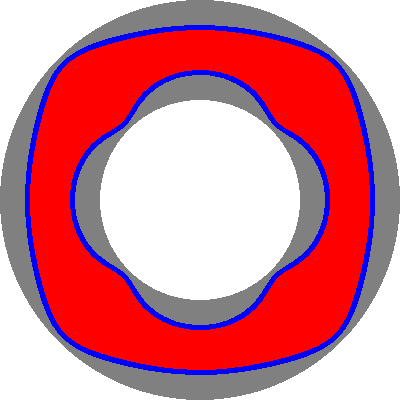

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

Traceback (most recent call last):
  File "/home/bin/openmc-voxel-to-vtk", line 72, in <module>
    main()
  File "/home/bin/openmc-voxel-to-vtk", line 23, in main
    fh = h5py.File(args.voxel_file, 'r')
  File "/home/lib/python3.9/site-packages/h5py/_hl/files.py", line 444, in __init__
    fid = make_fid(name, mode, userblock_size,
  File "/home/lib/python3.9/site-packages/h5py/_hl/files.py", line 199, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 100, in h5py.h5f.open
FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'voxel.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


In [11]:
xp = openmc.Plot()
xp.filename = 'Stellarator-xz'
xp.basis='xy'
xp.origin = [0,0,0]
xp.width = [400,400]
xp.pixels = [400,400]
xp.color_by = 'material'
xp.colors = {Plasma: 'red', Blanket: 'blue', Vacuum:'grey'}

vp = openmc.Plot()
vp.type = 'voxel'
vp.filename = 'voxel'
vp.width = (400,400,180)
vp.origin = (0,0,0)
vp.color_by = 'material'
vp.colors = {Plasma: 'red', Blanket: 'blue', Vacuum:'grey'}
vp.pixels = (400,400,int(400*ra/(R+ra)))

plots = openmc.Plots([xp,vp])
plots.export_to_xml()

openmc.plot_inline(xp)
os.system('openmc --plot')
os.system('openmc-voxel-to-vtk voxel.h5')
os.chdir('../')